In [595]:
import numpy
import pandas as pd # For our DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.linear_model import LinearRegression #For our linear regression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Read .csv to pandas dataframe

In [597]:
data=pd.read_excel("resale17.xlsx")
data.head()

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,CHOA CHU KANG,4 ROOM,104.0,Model A,1989,400000.0
1,BUKIT MERAH,3 ROOM,64.0,Standard,1969,404000.0
2,JURONG WEST,EXECUTIVE,141.0,Apartment,1989,422000.0
3,JURONG WEST,3 ROOM,74.0,Model A,1984,375000.0
4,JURONG EAST,4 ROOM,95.0,New Generation,1982,385000.0


In [598]:
data.info()             #check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   town                 2000 non-null   object 
 1   flat_type            2000 non-null   object 
 2   floor_area_sqm       2000 non-null   float64
 3   flat_model           2000 non-null   object 
 4   lease_commence_date  2000 non-null   int64  
 5   resale_price         2000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 93.9+ KB


We have succcessfully imported the dataset into python and examined few records. we can see id, town, block , area nd finally resales price
When we listed total records and each variable using info method in pandas we see that there are 2000 records and none of the variables have null values


In [600]:
data.describe()                   #can only identify numerical variables but not categorical variables

,floor_area_sqm,lease_commence_date,resale_price
count,2000.000000,2000.000000,2000.000000
mean,97.389250,1990.445500,453921.532940
std,24.387528,10.581352,129727.518779
min,34.000000,1967.000000,210000.000000
25%,76.000000,1983.000000,360000.000000
50%,97.000000,1988.000000,430000.000000
75%,111.000000,1999.250000,515250.000000
max,179.000000,2013.000000,991000.000000


## Scatter plot using Matplotlib

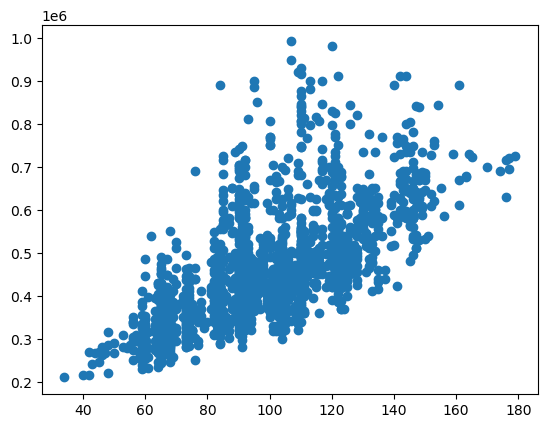

In [602]:
plt.scatter(data['floor_area_sqm'],data['resale_price'])

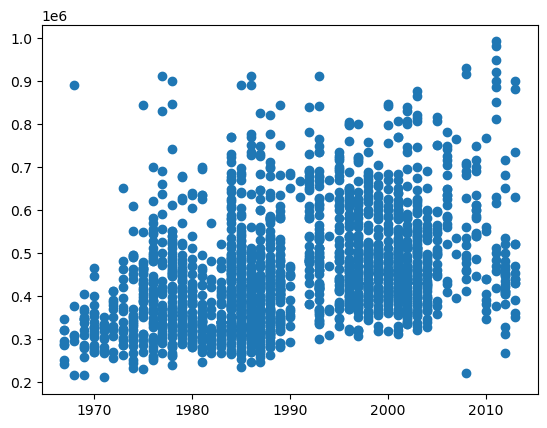

In [603]:
plt.scatter(data['lease_commence_date'],data['resale_price'])

## CHECK MULTICOLLINEARITY

**Method 3: VIF (remove column if VIF>5)**

In [606]:
# compute the vif for all given features
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(considered_features):

    X = data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [607]:
data.dtypes

town                    object
flat_type               object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

In [608]:
# Look at VIF for all the numeric
considered_features = ['floor_area_sqm', 'lease_commence_date', 'resale_price']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

C:\Users\stunn\AppData\Local\Temp\ipykernel_16268\2623466172.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,floor_area_sqm,1.998662
2,resale_price,1.889081
1,lease_commence_date,1.270670


## Defining Features and Labels

In [710]:
# lets build our linear model
# Let us use only 2 independent variables floor_area_sqm, lease_commence_date
X = data[['floor_area_sqm','lease_commence_date']]

# the dependent variable
y = data[['resale_price']]

display(X,y)

,floor_area_sqm,lease_commence_date
0,104.0,1989
1,64.0,1969
2,141.0,1989
3,74.0,1984
4,95.0,1982
...,...,...
1995,67.0,1970
1996,93.0,1985
1997,104.0,1989
1998,100.0,1998


,resale_price
0,400000.0
1,404000.0
2,422000.0
3,375000.0
4,385000.0
...,...
1995,353000.0
1996,400000.0
1997,428000.0
1998,416000.0


In [706]:
X.head()

,floor_area_sqm,lease_commence_date
0,104.0,1989
1,64.0,1969
2,141.0,1989
3,74.0,1984
4,95.0,1982


In [712]:
y.head()

,resale_price
0,400000.0
1,404000.0
2,422000.0
3,375000.0
4,385000.0


In [611]:
type(X)

pandas.core.frame.DataFrame

## Seperate train-test Features and train-test Labels

In [613]:
# Split X and y into training and test set in 90:10 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [615]:
len(X_train)

1800

In [714]:
type(X_train)

pandas.core.frame.DataFrame

## Train model using Linear Regression

Fit the linear model

In [617]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

## Coefficients for each of the independent variables

In [619]:
for i, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][i]))

The coefficient for floor_area_sqm is 3354.66084531965
The coefficient for lease_commence_date is 1272.849982080861


**Exploring enumerate() - not part of code**

In [621]:
#showing individual column header using for loop
#enumerate not used

for i in X_train.columns:
    print(i)

floor_area_sqm
lease_commence_date


In [622]:
#we cannot use this for loop because i = floor area. so regression_model.coef_[0][floor area] makes no sense
# we need i to be a number. An index value. Emunerate gives it an index value

#for i in X_train.columns:
#    print(i)
#    print(regression_model.coef_[0][i])

In [623]:
#showing individual column header using for loop
#enumerate used. i is indexed

for i, col_name in enumerate(X_train.columns):
    print(col_name)                  #column name printed individually
    print(i)                         #index printed individually

floor_area_sqm
0
lease_commence_date
1


In [624]:
print(regression_model.coef_)        #coef is in an array [0][0] and [0][1]
print(type(regression_model.coef_))  #this is a 2D ndarray. Should not be treated as 1D array for iteration
print(regression_model.coef_.shape)

[[3354.66084532 1272.84998208]]
<class 'numpy.ndarray'>
(1, 2)


In [625]:
a = [100,200]
print(a, type(a))

b = numpy.array(a)           #notice that there is no "," in an ndarray
print(b,type(b))

[100, 200] <class 'list'>
[100 200] <class 'numpy.ndarray'>


In [626]:
for i, col_name in enumerate(X_train.columns):
    print(X_train.columns[i])

floor_area_sqm
lease_commence_date


In [627]:
#nested for loop because list in list [[]]

for i in regression_model.coef_:
    for j in i:
        print(j)

3354.66084531965
1272.849982080861


In [628]:
#Alternative way to tackle [[]]

for i in regression_model.coef_[0]:
    print(i)

3354.66084531965
1272.849982080861


**END OF MY TESTING**

## Compare TEST samples

#### Original resale price (From y_test)

In [632]:
y_test[0:5]

,resale_price
674,473000.0
1699,445000.0
1282,325000.0
1315,315000.0
1210,495000.0


In [633]:
type(y_test)

pandas.core.frame.DataFrame

#### Predicted resale price (using X_test)

In [635]:
predicted_price_test= regression_model.predict(X_test)
predicted_price_test[0:5]               #display first 5 rows

array([[424201.72516748],
       [405810.49917856],
       [351672.03655252],
       [363817.82995172],
       [620163.72149878]])

In [636]:
type(predicted_price_test)

numpy.ndarray

## Compare TRAIN samples

#### Original resale price (From y_train)

In [639]:
y_train[0:5]

,resale_price
541,645000.0
1132,350000.0
1582,330000.0
1244,520000.0
1947,308000.0


#### Predicted resale (using X_train)

In [641]:
predicted_price_train= regression_model.predict(X_train)
predicted_price_train[0:5]               #display first 5 rows

array([[613918.28890907],
       [388918.37763127],
       [327606.70421368],
       [546825.07200267],
       [318125.42809933]])

If we see the predicted resale value in the test data set , we see the values are close and we can get few error metrics to see
how closely the values are predicted between train and test dataset

## Error metrics to see how closely the values are predicted between train and test dataset

**Get the mean square and root mean squared**

In [645]:
mean_absolute_error(y_train, predicted_price_train)

68687.5737001853

In [646]:
mean_absolute_error(y_test, predicted_price_test)

62134.40248949274

In [647]:
type(y_train)

pandas.core.frame.DataFrame

In [648]:
type(predicted_price_train)

numpy.ndarray

**.to_numpy() - Converting from pandas to numpy.dnarray**

In [650]:
y_train_arr=y_train.to_numpy()

In [651]:
type(y_train_arr)

numpy.ndarray

**pd.DataFrame() - Converting from numpy.dnarray to pandas**

In [653]:
predicted_price_train_ds = pd.DataFrame(predicted_price_train)

In [654]:
mse_train=mean_squared_error(y_train_arr, predicted_price_train)
print(mse_train)

9006429957.514896


In [655]:
# taking root of mean squared error
root_mean_squared_error = sqrt(mse_train)
root_mean_squared_error


94902.21260600247

In [656]:
mse_test=mean_squared_error(y_test, predicted_price_test)
print(mse_test)

7989198239.794343


In [657]:
# taking root of mean squared error
root_mean_squared_error_test = sqrt(mse_test)
root_mean_squared_error_test

89382.31502816618

**R Square for both train and test datasets**

In [659]:
r_sq_train = regression_model.score(X_train,y_train)
r_sq_train

0.4657340529073941

In [660]:
r_sq_test = regression_model.score(X_test,y_test)
r_sq_test

0.5154089481866307

The R squareis a bit low and that is because we are using only 2 variables and we may need more factors that can 
determine the resale value than the square feet and lease commence date